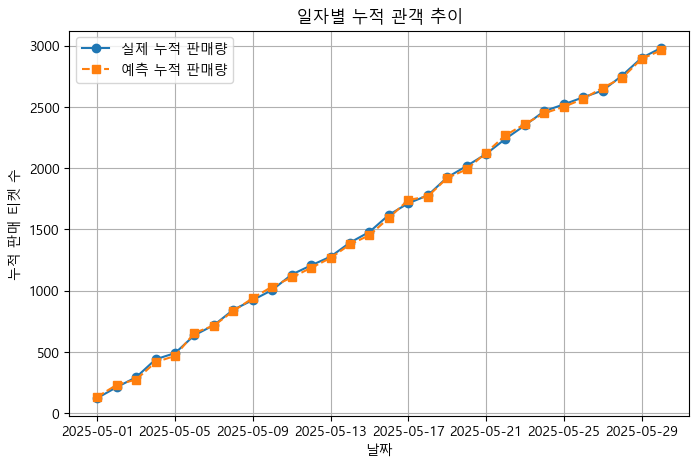

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] ='Malgun Gothic'

# 30일간의 날짜 생성
dates = pd.date_range(start="2025-05-01", periods=30)
# 실제 누적 판매량 (예: 초기 50~150 티켓씩 누적)
actual_sales = np.cumsum(np.random.randint(50, 150, size=30))
# 예측 누적 판매량 (실제값에 약간의 노이즈 추가)
predicted_sales = actual_sales + np.random.randint(-30, 30, size=30)

plt.figure(figsize=(8, 5))
plt.plot(dates, actual_sales, label="실제 누적 판매량", marker="o")
plt.plot(dates, predicted_sales, label="예측 누적 판매량", marker="s", linestyle="--")
plt.title("일자별 누적 관객 추이")
plt.xlabel("날짜")
plt.ylabel("누적 판매 티켓 수")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 과거 공연 데이터 (동일 장르 "뮤지컬"만 선택)
data = {
    "performance_name": ["공연 A", "공연 B", "공연 C"],
    "genre": ["뮤지컬", "뮤지컬", "뮤지컬"],
    "accumulated_sales": [4800, 5200, 5000]
}
df_past = pd.DataFrame(data)

# 현재 기획 공연 정보 (예측 누적 판매량 5100)
current_perf = {"performance_name": "현재 공연", "genre": "뮤지컬", "predicted_sales": 5100}

# 동일 장르인 공연 데이터에 현재 공연 추가
df_compare = df_past.copy()
df_compare = df_compare.append({
    "performance_name": current_perf["performance_name"],
    "genre": current_perf["genre"],
    "accumulated_sales": current_perf["predicted_sales"]
}, ignore_index=True)

plt.figure(figsize=(8, 5))
bars = plt.bar(df_compare["performance_name"], df_compare["accumulated_sales"], 
               color=["#4CAF50", "#2196F3", "#FFC107", "#9C27B0"])
plt.title("동일 장르 공연 비교 (누적 판매 티켓 수)")
plt.ylabel("누적 판매 티켓 수")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 50, f'{height:.0f}', ha="center", fontweight="bold")
plt.show()




AttributeError: 'DataFrame' object has no attribute 'append'

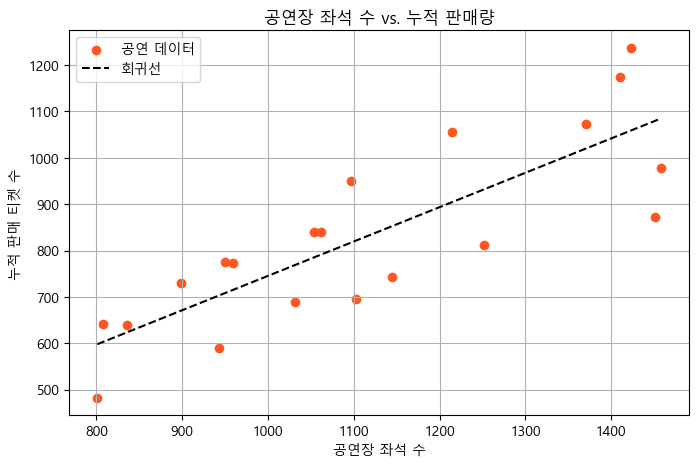

In [6]:
# 예시 데이터: 공연장 좌석 수와 누적 판매량
n = 20
capacities = np.random.randint(800, 1500, size=n)
accumulated_sales = (capacities * np.random.uniform(0.6, 0.9, size=n)).astype(int)

# 선형 회귀선 계산
coef = np.polyfit(capacities, accumulated_sales, 1)
poly_fn = np.poly1d(coef)

plt.figure(figsize=(8, 5))
plt.scatter(capacities, accumulated_sales, color="#FF5722", label="공연 데이터")
plt.plot(np.sort(capacities), poly_fn(np.sort(capacities)), color="black", linestyle="--", label="회귀선")
plt.title("공연장 좌석 수 vs. 누적 판매량")
plt.xlabel("공연장 좌석 수")
plt.ylabel("누적 판매 티켓 수")
plt.legend()
plt.grid(True)
plt.show()


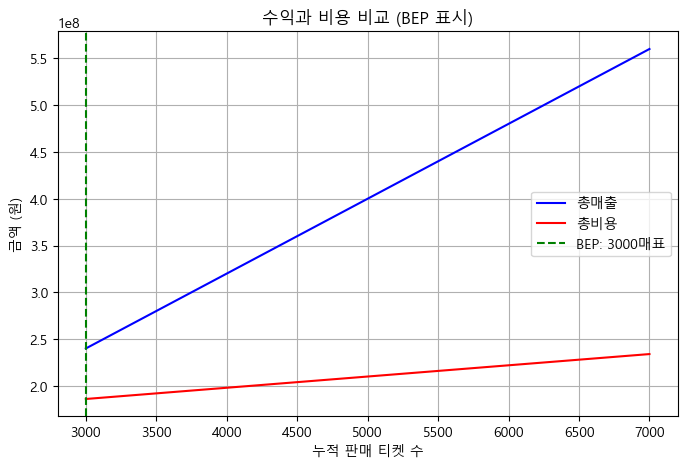

In [7]:
# 예시 값 (단위: 원, 관객 수)
accumulated_sales = np.linspace(3000, 7000, 50)
ticket_price = 80000
production_cost = 120000000
marketing_budget = 30000000
variable_cost_rate = 0.15

total_revenue = ticket_price * accumulated_sales
total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * accumulated_sales)

plt.figure(figsize=(8, 5))
plt.plot(accumulated_sales, total_revenue, label="총매출", color="blue")
plt.plot(accumulated_sales, total_cost, label="총비용", color="red")
# BEP 지점: 누적 판매량이 BEP에 해당하는 지점을 찾아 표시
idx = np.argmin(np.abs(total_revenue - total_cost))
bep_sales = accumulated_sales[idx]
plt.axvline(bep_sales, color="green", linestyle="--", label=f"BEP: {int(bep_sales)}매표")
plt.title("수익과 비용 비교 (BEP 표시)")
plt.xlabel("누적 판매 티켓 수")
plt.ylabel("금액 (원)")
plt.legend()
plt.grid(True)
plt.show()


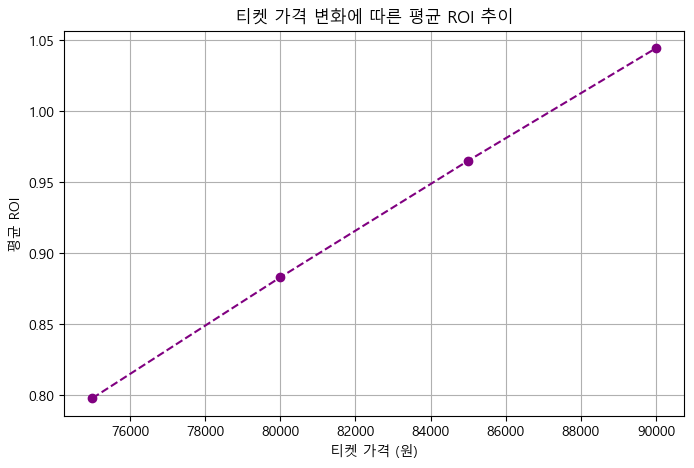

In [8]:
# 시나리오: 티켓 가격 변화에 따른 ROI 변화를 관찰
ticket_prices = np.array([75000, 80000, 85000, 90000])
roi_values = []

for price in ticket_prices:
    revenue = price * accumulated_sales  # 동일 누적판매 수치를 사용
    cost = production_cost + marketing_budget + (price * variable_cost_rate * accumulated_sales)
    roi = (revenue - cost) / cost
    roi_values.append(np.mean(roi))  # 평균 ROI를 계산

plt.figure(figsize=(8, 5))
plt.plot(ticket_prices, roi_values, marker="o", linestyle="--", color="purple")
plt.title("티켓 가격 변화에 따른 평균 ROI 추이")
plt.xlabel("티켓 가격 (원)")
plt.ylabel("평균 ROI")
plt.grid(True)
plt.show()


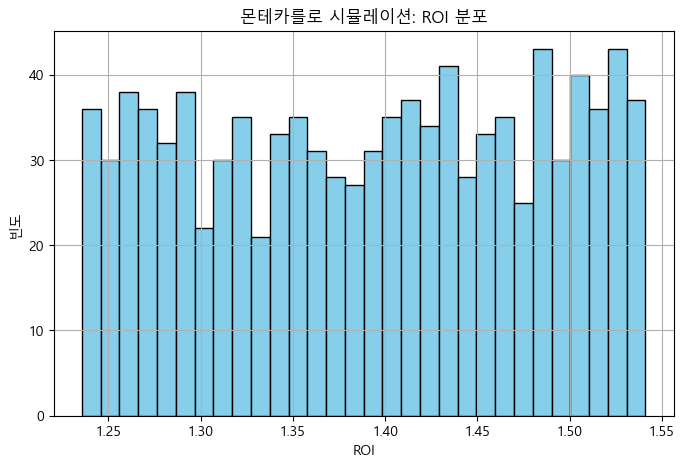

In [9]:
# 몬테카를로 시뮬레이션: 누적 판매량에 변동성을 부여해 ROI 분포 확인
n_sim = 1000
roi_sim = []
for _ in range(n_sim):
    # 누적 판매량에 ±10% 변동 적용
    sim_sales = accumulated_sales[-1] * np.random.uniform(0.9, 1.1)
    revenue_sim = ticket_price * sim_sales
    cost_sim = production_cost + marketing_budget + (ticket_price * variable_cost_rate * sim_sales)
    roi_sim.append((revenue_sim - cost_sim) / cost_sim)

plt.figure(figsize=(8, 5))
plt.hist(roi_sim, bins=30, color="skyblue", edgecolor="black")
plt.title("몬테카를로 시뮬레이션: ROI 분포")
plt.xlabel("ROI")
plt.ylabel("빈도")
plt.grid(True)
plt.show()


In [10]:
import pandas as pd

# 예시 데이터: 각 공연의 최종 booking_rate (누적 예매율)
data = {
    "공연명": ["공연 A", "공연 B", "공연 C", "현재 공연"],
    "booking_rate": [0.78, 0.65, 0.55, 0.68]  # 비율 (예: 0.78 = 78%)
}
df = pd.DataFrame(data)

def risk_level(rate):
    if rate >= 0.75:
        return "안정 (저위험)"
    elif 0.60 <= rate < 0.75:
        return "중위험"
    else:
        return "고위험"

df["위험도"] = df["booking_rate"].apply(risk_level)
print(df)


     공연명  booking_rate       위험도
0   공연 A          0.78  안정 (저위험)
1   공연 B          0.65       중위험
2   공연 C          0.55       고위험
3  현재 공연          0.68       중위험


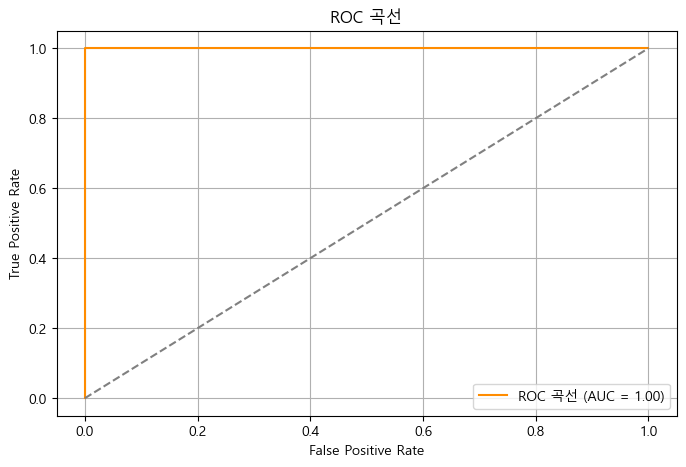

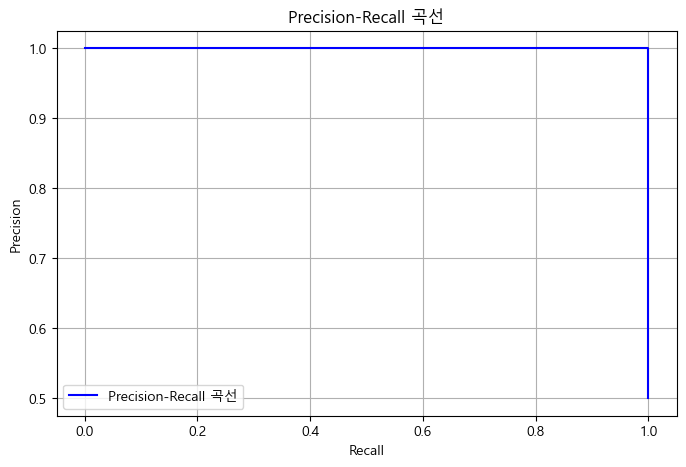

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 예시: 실제 라벨(성공: 1, 부진: 0)과 모델 예측 확률
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])
y_scores = np.array([0.85, 0.40, 0.78, 0.90, 0.55, 0.30, 0.80, 0.45, 0.88, 0.35])

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC 곡선 (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC 곡선")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="Precision-Recall 곡선", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall 곡선")
plt.legend()
plt.grid(True)
plt.show()


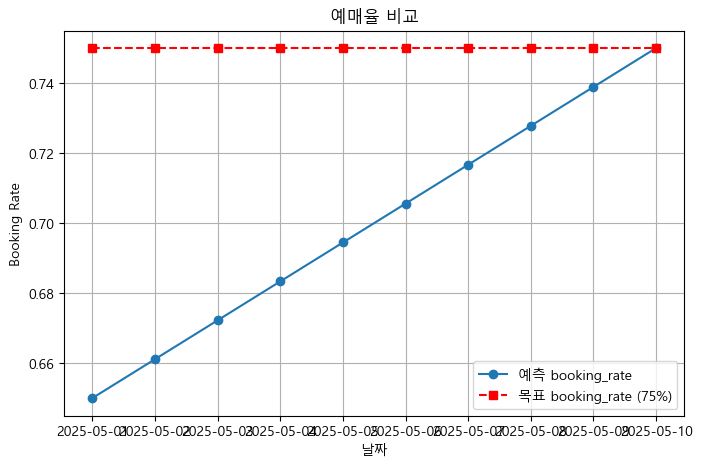

In [12]:
# 예시: 날짜별 예측된 booking_rate와 목표치(예: 75%) 비교
dates = pd.date_range(start="2025-05-01", periods=10)
predicted_booking_rate = np.linspace(0.65, 0.75, 10)  # 예측 추세
target_rate = np.full(10, 0.75)  # 목표치 75%

plt.figure(figsize=(8, 5))
plt.plot(dates, predicted_booking_rate, marker="o", label="예측 booking_rate")
plt.plot(dates, target_rate, marker="s", linestyle="--", label="목표 booking_rate (75%)", color="red")
plt.title("예매율 비교")
plt.xlabel("날짜")
plt.ylabel("Booking Rate")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# 예시: 캠페인별 전환율 계산
campaign_data = {
    "캠페인": ["캠페인 A", "캠페인 B", "캠페인 C"],
    "ad_exposure": [30000, 25000, 28000],
    "daily_sales": [1500, 1000, 1400]
}
df_campaign = pd.DataFrame(campaign_data)
df_campaign["마케팅 전환률 (%)"] = (df_campaign["daily_sales"] / df_campaign["ad_exposure"]) * 100
print(df_campaign)


     캠페인  ad_exposure  daily_sales  마케팅 전환률 (%)
0  캠페인 A        30000         1500          5.0
1  캠페인 B        25000         1000          4.0
2  캠페인 C        28000         1400          5.0
